# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
from scipy.stats import f,f_oneway,kruskal,ttest_ind,levene,shapiro,kstest,norm
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot

## If Ttest Fails What to do?

We will perform a KS Test

In [4]:
df = pd.read_csv("Sachin_ODI.csv")

In [5]:
df.groupby(["Inns"])["runs"].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [6]:
df_first_innings = df[df["Inns"]==1]
df_second_innings = df[df["Inns"]==2]

<AxesSubplot:xlabel='runs', ylabel='Density'>

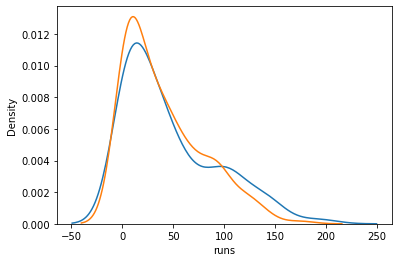

In [7]:
sns.kdeplot(df_first_innings["runs"])
sns.kdeplot(df_second_innings["runs"])

In [8]:
# Ho : Scoring patterns in both innings are same
# Ha : Scoring patterns are different

ttest_ind(df_first_innings["runs"],df_second_innings["runs"])

# Fail to Reject Ho

Ttest_indResult(statistic=1.4612016295532178, pvalue=0.14483724194759962)

In [10]:
e1 = ECDF(df_first_innings["runs"])
e2 = ECDF(df_second_innings["runs"])

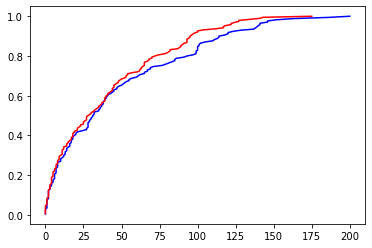

In [11]:
plt.plot(e1.x, e1.y, c='b')
plt.plot(e2.x, e2.y, c='r')

In [13]:
# Ho : Scoring patterns in both innings are same
# Ha : Scoring patterns are different

kstest(df_first_innings["runs"],df_second_innings["runs"])

# pvalue is high --> fail to reject the Ho

KstestResult(statistic=0.10990712074303406, pvalue=0.2086874783173226)

In [14]:
df.groupby(["Won"])["runs"].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [15]:
df_won = df[df["Won"]==True]
df_lost = df[df["Won"]==False]

<AxesSubplot:xlabel='runs', ylabel='Density'>

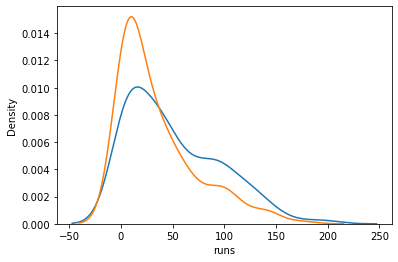

In [16]:
sns.kdeplot(df_won["runs"])
sns.kdeplot(df_lost["runs"])

In [17]:
# H0: No differenc
ttest_ind(df_won["runs"], df_lost["runs"])
# p-values is very low --> 

Ttest_indResult(statistic=3.628068563969343, pvalue=0.00032706154973653116)

In [18]:
e1 = ECDF(df_won["runs"])
e2 = ECDF(df_lost["runs"])

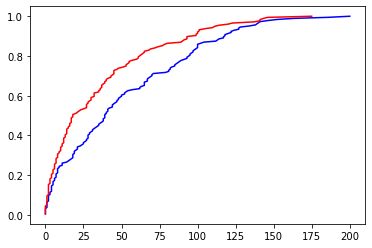

In [20]:
plt.plot(e1.x, e1.y, c='b')
plt.plot(e2.x, e2.y, c='r')

## QQ Plot 

In [22]:
# When I want to check whether the distribution is Gaussian or not?


In [32]:
df1=pd.read_csv("weight-height.csv")
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<AxesSubplot:xlabel='Height', ylabel='Density'>

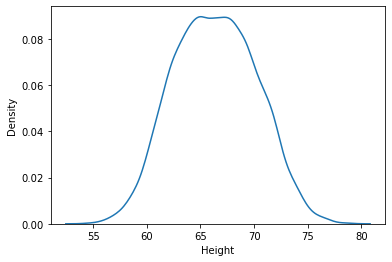

In [33]:
sns.kdeplot(df1["Height"])

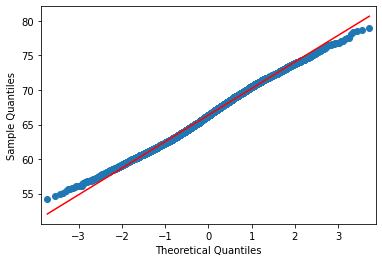

In [39]:
qqplot(df1["Height"],line="s")
plt.show()

In [40]:
df2=pd.read_csv("waiting_time.csv")
df2

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439
...,...
90041,135.885984
90042,15.223970
90043,207.839528
90044,140.488418


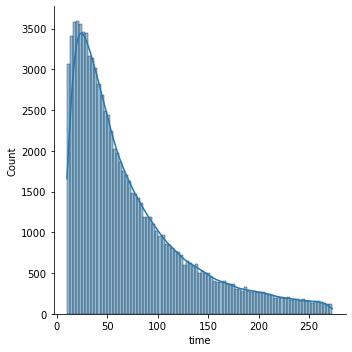

In [41]:
sns.displot(df2["time"],kde=True)


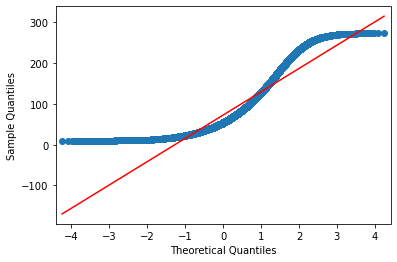

In [42]:
qqplot(df2["time"],line="s")
plt.show()

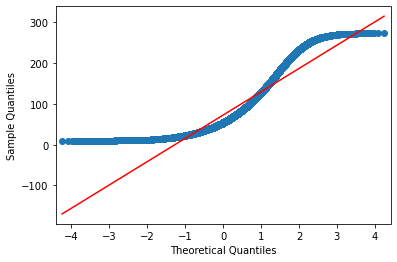

In [48]:
qqplot(df2["time"],line="s")
plt.show()

# Correlation Covariance

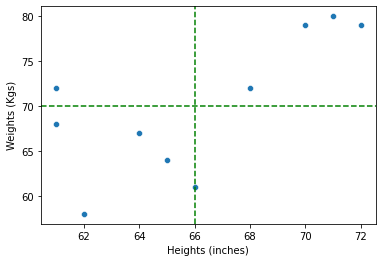

In [57]:
# Ravi -->
heights = np.array([68, 62, 64, 61, 70, 66, 61, 65, 71, 72]) # inches
weights = np.array([72, 58, 67, 72, 79, 61, 68, 64, 80, 79]) # kgs

sns.scatterplot(x=heights, y=weights)
plt.axvline(heights.mean(),color="green",linestyle="--")
plt.axhline(weights.mean(),color="green",linestyle="--")

plt.xlabel("Heights (inches)")
plt.ylabel("Weights (Kgs)")
plt.show()

In [60]:
covariance=(((heights-heights.mean())*(weights-weights.mean())).sum())/len(heights)
print("Covariance : ",covariance)

Covariance :  20.4


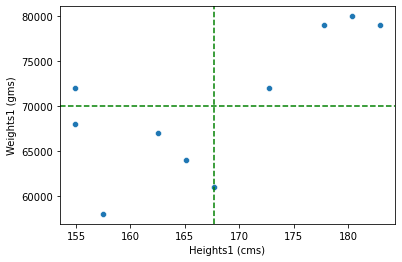

In [59]:
# Rishav --> USA
heights1 = np.array([68, 62, 64, 61, 70, 66, 61, 65, 71, 72])*2.54 # cms
weights1 = np.array([72, 58, 67, 72, 79, 61, 68, 64, 80, 79])*1000 # gms

sns.scatterplot(x=heights1, y=weights1)
plt.axvline(heights1.mean(),color="green",linestyle="--")
plt.axhline(weights1.mean(),color="green",linestyle="--")

plt.xlabel("Heights1 (cms)")
plt.ylabel("Weights1 (gms)")
plt.show()

In [61]:
covariance1=(((heights1-heights1.mean())*(weights1-weights1.mean())).sum())/len(heights1)
print("Covariance : ",covariance1)

Covariance :  51816.00000000001


In [63]:
covariance/(heights.std()*weights.std())

0.7094289771951879

In [64]:
covariance1/(heights1.std()*weights1.std())

0.7094289771951878